# Notebook 05: Visualization Analysis

This notebook supports the results and discussion sections of the paper titled:

**Performance Assessment of Machine Learning Models for Network Anomaly Detection: A Case Study with CICIDS2017**

We visualize the results of anomaly detection using multiple models (Isolation Forest, One-Class SVM, K-Means, LOF) across protocols (HTTP, DNS, DHCP, BROWSER).


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# 📦 Cell 1: Import Libraries and Load Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the Isolation Forest output
output_path = '/content/drive/MyDrive/anomaly_detection_output.csv'  # Adjust if necessary
df = pd.read_csv(output_path)

# Ensure anomaly labels are integers (fixes visualization errors)
df['anomaly_label'] = df['anomaly_label'].astype(int)

# Display basic info
df.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,anomaly_score,anomaly_label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,0.084698,1
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,0.106736,1
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,0.092508,1
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,0.089318,1
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,0.084698,1


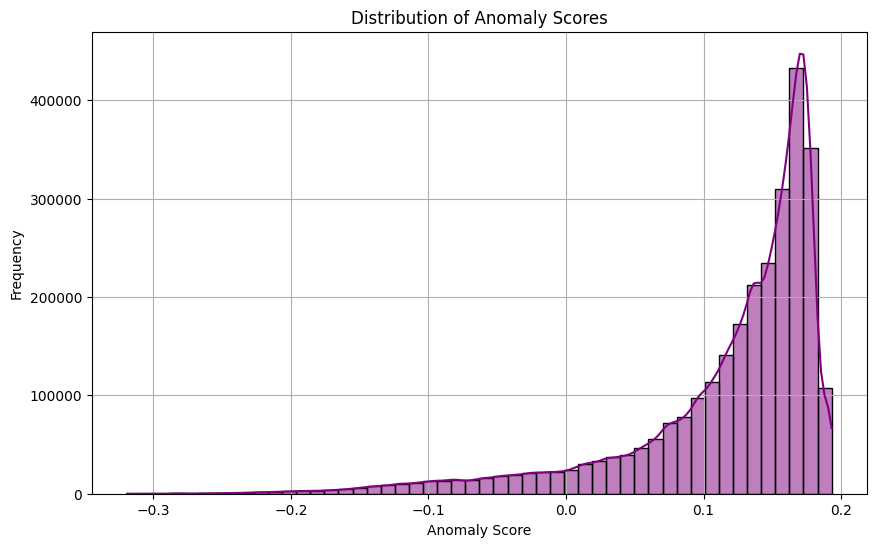

In [2]:
# 📊 Cell 2: Distribution of Anomaly Scores

plt.figure(figsize=(10, 6))
sns.histplot(df['anomaly_score'], bins=50, kde=True, color='purple')
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [3]:
# 🔍 Cell 3: PCA for 2D Visualization of Anomalies

# Select numerical features (exclude scores and labels)
features = df.select_dtypes(include='number').drop(columns=['anomaly_score', 'anomaly_label'])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Store PCA results
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


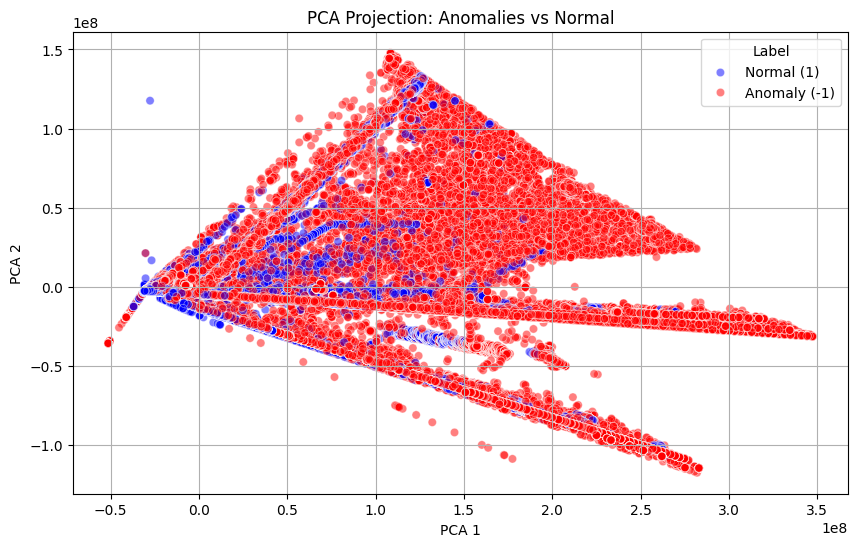

In [4]:
# 🧯 Cell 4: Scatter Plot of PCA Results

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca_1', y='pca_2',
    hue='anomaly_label',
    data=df,
    palette={1: 'blue', -1: 'red'},
    alpha=0.5
)
plt.title('PCA Projection: Anomalies vs Normal')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Label', labels=['Normal (1)', 'Anomaly (-1)'])
plt.grid(True)
plt.show()


<ipython-input-6-8faad601f72a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='anomaly_label', data=df, palette={'1': 'blue', '-1': 'red'})


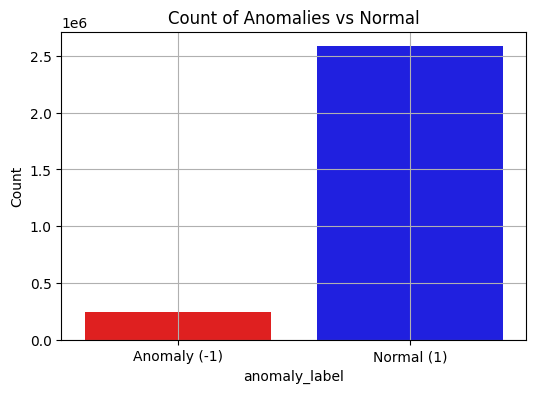

In [6]:
# 📈 Cell 5: Count of Anomalies vs Normal

plt.figure(figsize=(6, 4))
sns.countplot(x='anomaly_label', data=df, palette={'1': 'blue', '-1': 'red'})
plt.xticks([0, 1], ['Anomaly (-1)', 'Normal (1)'])  # match Isolation Forest label meaning
plt.title('Count of Anomalies vs Normal')
plt.ylabel('Count')
plt.grid(True)
plt.show()



In [3]:
# 🔁 Cell 6: Model Comparison – Manually Entered Metrics

# Add summary results for each model for comparison
performance = {
    'Model': ['Isolation Forest', 'One-Class SVM', 'K-Means', 'LOF'],
    'Precision': [0.56, 0.41, 0.14, 0.02],
    'Recall': [0.62, 0.42, 0.77, 0.02],
    'F1-Score': [0.59, 0.41, 0.23, 0.02],
    'Accuracy': [0.98, 0.98, 0.90, 0.96]
}

df_perf = pd.DataFrame(performance)
df_perf


,Model,Precision,Recall,F1-Score,Accuracy
0,Isolation Forest,0.56,0.62,0.59,0.98
1,One-Class SVM,0.41,0.42,0.41,0.98
2,K-Means,0.14,0.77,0.23,0.90
3,LOF,0.02,0.02,0.02,0.96
